In [1]:
!pip install yfinance
!pip3 install yfinance

zsh:1: command not found: pip
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/58/f7/a966b800b49cb5379e348bf0717df481051714a99ece15289718562f6952/yfinance-0.2.35-py2.py3-none-any.whl.metadata
  Obtaining dependency information for lxml>=4.9.1 from https://files.pythonhosted.org/packages/56/75/aa934ccbc158d181dcdc32e087a0c37d437f39466489ee395a7aa44e4884/lxml-5.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 7.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [2]:
import yfinance as yf
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ticker= "QCOM" ### Alibaba
stock_data = yf.download(ticker, start="1992-01-01", end="2022-12-24")
Qualcomm_Price = stock_data['Adj Close']

ticker= "INTC" ### Alibaba
stock_data = yf.download(ticker, start="1992-01-01", end="2022-12-24")
IntelCorp_Price = stock_data['Adj Close']

ticker= "MU" ### Alibaba
stock_data = yf.download(ticker, start="1992-01-01", end="2022-12-24")
Micron_Price = stock_data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
ticker= "^IRX" ### Alibaba
rate_data = yf.download(ticker, start="1992-01-01", end="2022-12-24")
Tbill_Rate = rate_data['Adj Close']
DailyTB = Tbill_Rate/365  ### this is an approx by dividing 13-week p.a. Tbill rate

[*********************100%%**********************]  1 of 1 completed


In [5]:
ticker= "^GSPC" ### Alibaba
index_data = yf.download(ticker, start="1992-01-01", end="2022-12-24")
SPX = index_data['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [6]:
Qualcomm_Ret=np.log(Qualcomm_Price/Qualcomm_Price.shift(1))
IntelCorp_Ret=np.log(IntelCorp_Price/IntelCorp_Price.shift(1))
Micron_Ret=np.log(Micron_Price/Micron_Price.shift(1))
SPX_Ret=np.log(SPX/SPX.shift(1))
ExQualcomm_Ret=Qualcomm_Ret[1:,]-DailyTB[1:,]
ExIntelCorp_Ret=IntelCorp_Ret[1:,]-DailyTB[1:,]
ExMicron_Ret=Micron_Ret[1:,]-DailyTB[1:,]
ExSPX_Ret=SPX_Ret[1:,]-DailyTB[1:,]

In [7]:
print(len(Qualcomm_Ret),len(SPX_Ret))

7805 7805


In [8]:
from statsmodels.api import add_constant
from statsmodels.regression.rolling import RollingOLS
ExSPX_Ret = add_constant(ExSPX_Ret, prepend=False)

mod1 = RollingOLS(ExQualcomm_Ret, ExSPX_Ret, window=60, expanding=False)
rolling_result1 = mod1.fit()
mod2 = RollingOLS(ExIntelCorp_Ret, ExSPX_Ret, window=60, expanding=False)
rolling_result2 = mod2.fit()
mod3 = RollingOLS(ExMicron_Ret, ExSPX_Ret, window=60, expanding=False)
rolling_result3 = mod3.fit()
### Note rolling_result#.param is a dataframe

In [9]:
rolling_result1.params.columns = ['Exc_Mkt_Ret', 'Constant']
rolling_result2.params.columns = ['Exc_Mkt_Ret', 'Constant']
rolling_result3.params.columns = ['Exc_Mkt_Ret', 'Constant']

In [10]:
pd.set_option('display.max_rows', None)
print(rolling_result1.params.iloc[59:100,]) ### previous dates all NaN as being part of first window of length 60

            Exc_Mkt_Ret  Constant
Date                             
1992-03-27     2.608788  0.014306
1992-03-30     2.597587  0.014238
1992-03-31     2.589443  0.016182
1992-04-01     2.548143  0.015264
1992-04-02     2.818136  0.020048
1992-04-03     2.816915  0.018254
1992-04-06     2.748148  0.017567
1992-04-07     2.385256  0.012997
1992-04-08     2.463625  0.014711
1992-04-09     2.155432  0.010194
1992-04-10     2.149158  0.010447
1992-04-13     2.194512  0.011561
1992-04-14     2.137136  0.010753
1992-04-15     2.122461  0.011165
1992-04-16     2.061524  0.010040
1992-04-20     1.808335  0.008630
1992-04-21     1.807112  0.008647
1992-04-22     1.798767  0.009431
1992-04-23     1.735077  0.008622
1992-04-24     1.903290  0.009547
1992-04-27     1.876504  0.008677
1992-04-28     1.889304  0.007414
1992-04-29     1.902642  0.007343
1992-04-30     1.795232  0.005471
1992-05-01     1.753892  0.005561
1992-05-04     1.695989  0.004978
1992-05-05     1.659656  0.005134
1992-05-06    

In [11]:
M1 = rolling_result1.params['Exc_Mkt_Ret']
M1 = M1.iloc[59:7805,]
M2 = rolling_result2.params['Exc_Mkt_Ret']
M2 = M2.iloc[59:7805,]
M3 = rolling_result3.params['Exc_Mkt_Ret']
M3 = M1.iloc[59:7805,]

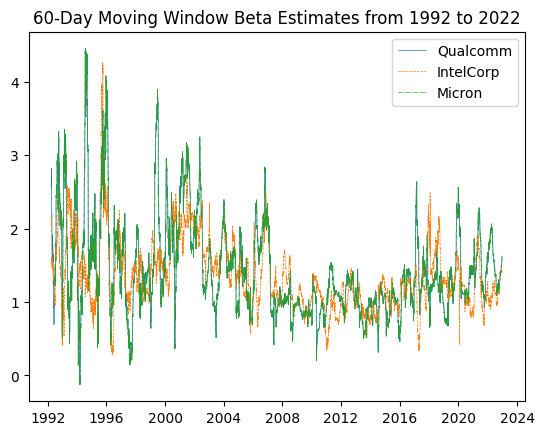

In [12]:
import matplotlib.pyplot as plt
plt.plot(M1,linestyle="-",linewidth=.5)
plt.plot(M2,linestyle="--",linewidth=.5)
plt.plot(M3,linestyle="-.",linewidth=.5)
plt.title('60-Day Moving Window Beta Estimates from 1992 to 2022')
plt.legend(['Qualcomm', 'IntelCorp','Micron'])
plt.show()

In [13]:
### great uncertainty in 1990s to 2000s -- though chips were eventually surging. Rising uncertainty in 2022.

Text(0.5, 1.0, 'Qualcomm Return Rates from 1992 to 2022')

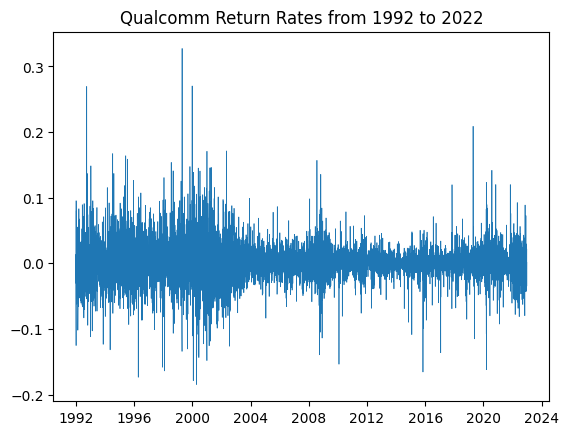

In [13]:
### Check to see comparative stock return movements
import matplotlib.pyplot as plt
plt.plot(Qualcomm_Ret,linestyle="-",linewidth=.5)
plt.title('Qualcomm Return Rates from 1992 to 2022')

Text(0.5, 1.0, 'IntelCorp Return Rates from 1992 to 2022')

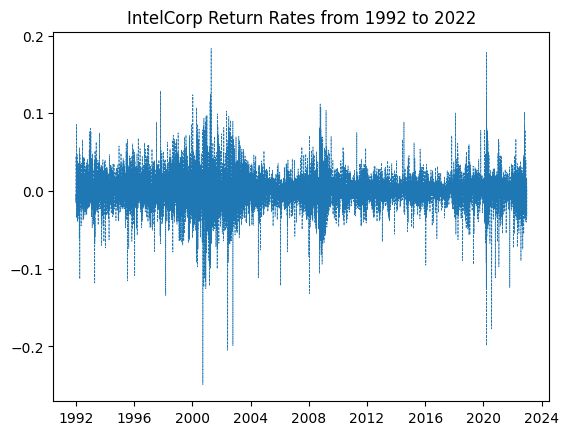

In [14]:
plt.plot(IntelCorp_Ret,linestyle="--",linewidth=.5)
plt.title('IntelCorp Return Rates from 1992 to 2022')

Text(0.5, 1.0, 'Micron Return Rates from 1992 to 2022')

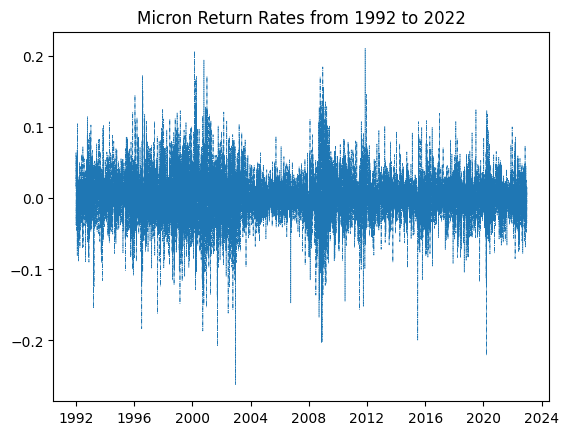

In [15]:
plt.plot(Micron_Ret,linestyle="-.",linewidth=.5)
plt.title('Micron Return Rates from 1992 to 2022')

Text(0.5, 1.0, 'SPX Return Rates from 1992 to 2022')

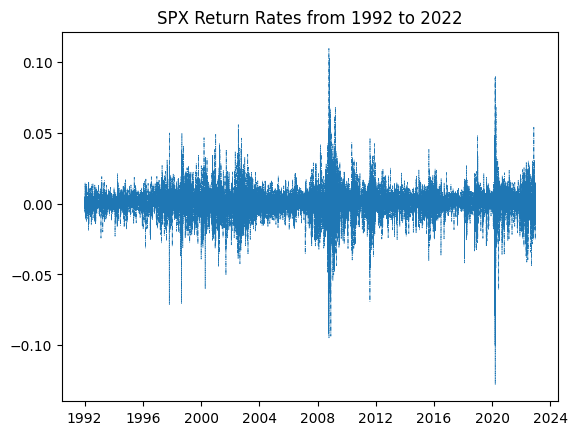

In [16]:
plt.plot(SPX_Ret,linestyle="-.",linewidth=.5)
plt.title('SPX Return Rates from 1992 to 2022')